In [13]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np



[[1.83e+03], [3.79e+03], [5.41e+03], ..., [4.44e+03], [3.41e+03], [1.71e+03]]


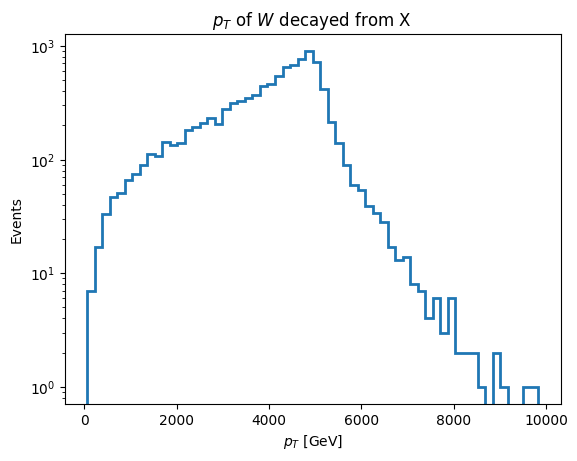

In [14]:
file = "X_prod.root"
tree = uproot.open(file)["Delphes;1"]

pid = tree["Particle/Particle.PID"].array()
pt  = tree["Particle/Particle.PT"].array()
m1  = tree["Particle/Particle.M1"].array()

VLQ_PDG = 6000005

# Identify W bosons
isW = (abs(pid) == 24)

# Get mother PID 
mother_pid = ak.where(
    m1 >= 0,
    pid[m1],
    -999
)

# W directly from VLQ X
isW_from_X = isW & (abs(mother_pid) == VLQ_PDG)

W_from_X_pt = pt[isW_from_X]

print(W_from_X_pt)

# Plot
plt.hist(ak.to_numpy(W_from_X_pt), bins=60, histtype="step", linewidth=2)
plt.xlabel(r"$p_T$ [GeV]")
plt.ylabel("Events")
plt.title(r"$p_T$ of $W$ decayed from X ")
plt.yscale("log")
plt.show()


Top-quark pT (event-wise):
[[1.37e+03], [5.85e+03], [4.54e+03], ..., [4.8e+03], [3.16e+03], [1.16e+03]]

Top-quark pT (flattened):
[1.37e+03, 5.85e+03, 4.54e+03, 4.7e+03, ..., 4.8e+03, 3.16e+03, 1.16e+03]


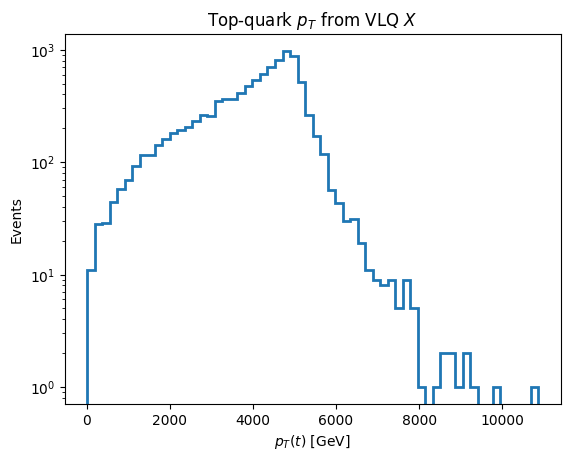

In [15]:

# ==============================
# Input ROOT file
# ==============================
#tree = uproot.open("X_prod.root")["Delphes;1"]

# ==============================
# Read branches
# ==============================
pid = tree["Particle/Particle.PID"].array()
pt  = tree["Particle/Particle.PT"].array()
m1  = tree["Particle/Particle.M1"].array()

VLQ_PDG = 6000005

# ==============================
# Mother PID
# ==============================
mother_pid = ak.where(m1 >= 0, pid[m1], -999)

# ==============================
# Select top from X
# ==============================
top_pt = pt[(abs(pid) == 6) & (abs(mother_pid) == VLQ_PDG)]

# ==============================
# PRINT pT array
# ==============================
print("Top-quark pT (event-wise):")
print(top_pt)

# Flatten for plotting
top_pt_flat = ak.flatten(top_pt)

print("\nTop-quark pT (flattened):")
print(top_pt_flat)

# ==============================
# Plot
# ==============================
plt.hist(
    ak.to_numpy(top_pt_flat),
    bins=60,
    histtype="step",
    linewidth=2
)
plt.xlabel(r"$p_T(t)$ [GeV]")
plt.ylabel("Events")
plt.title("Top-quark $p_T$ from VLQ $X$")
plt.yscale("log")
plt.show()


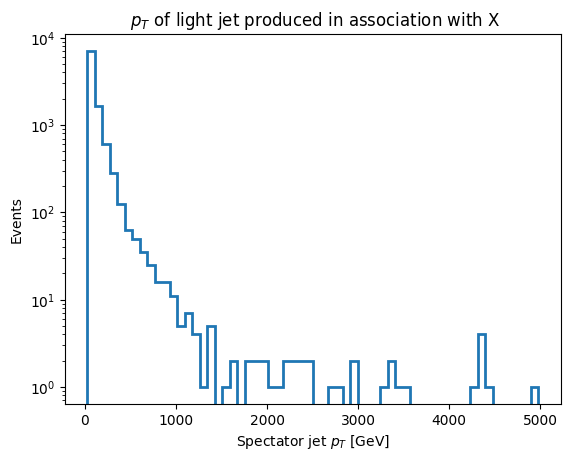

In [17]:
jet_pt   = tree["Jet/Jet.PT"].array()
jet_eta  = tree["Jet/Jet.Eta"].array()
jet_btag = tree["Jet/Jet.BTag"].array()

# light jets only
is_light = (jet_btag == 0)      ###the spectator jet is NOT a b-jet

# most forward light jet
idx = ak.argmax(abs(jet_eta[is_light]), axis=1)  ###for each event, find the index of the jet with the largest |η|

spectator_pt = jet_pt[is_light][
    ak.local_index(jet_pt[is_light]) == idx   ###selecting light (non-b-tagged) jet whose index matches the most forward jet,
]

spectator_pt_flat = ak.flatten(spectator_pt)

plt.hist(
    ak.to_numpy(spectator_pt_flat),
    bins=60,
    histtype="step",
    linewidth=2
)
plt.xlabel(r"Spectator jet $p_T$ [GeV]")
plt.ylabel("Events")
plt.title(" $p_T$ of light jet produced in association with X")
plt.yscale("log")
plt.show()


ΔR(W, b) event-wise:
[[0.418, 0.423], [0.147, 0.0527], [1.15, ...], ..., [2.1, 0.195], [1.63, 0.511]]

ΔR(W, b) flattened:
[0.418, 0.423, 0.147, 0.0527, 1.15, 0.0792, ..., 0.068, 2.1, 0.195, 1.63, 0.511]


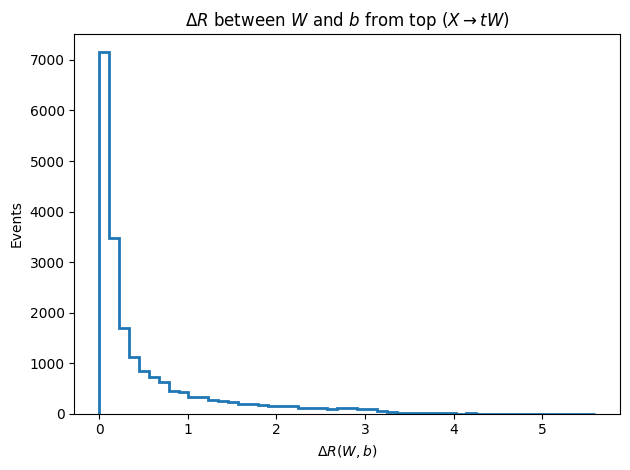

In [25]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# Input ROOT file
# ==============================
tree = uproot.open("X_prod.root")["Delphes;1"]

# ==============================
# Read Particle branches
# ==============================
pid  = tree["Particle/Particle.PID"].array()
pt   = tree["Particle/Particle.PT"].array()
eta  = tree["Particle/Particle.Eta"].array()
phi  = tree["Particle/Particle.Phi"].array()
m1   = tree["Particle/Particle.M1"].array()

VLQ_PDG = 6000005

# ==============================
# Mother PID
# ==============================
mother_pid = ak.where(m1 >= 0, pid[m1], -999)

# ==============================
# Select top from X
# ==============================
isTop_from_X = (abs(pid) == 6) & (abs(mother_pid) == VLQ_PDG)

# ==============================
# Select W and b from that top
# ==============================
# W from top
isW_from_top = (abs(pid) == 24) & (abs(mother_pid) == 6)

# b from top
isb_from_top = (abs(pid) == 5) & (abs(mother_pid) == 6)

W_eta = eta[isW_from_top]
W_phi = phi[isW_from_top]

b_eta = eta[isb_from_top]
b_phi = phi[isb_from_top]

# ==============================
# ΔR calculation
# ==============================
dphi = abs(W_phi - b_phi)
dphi = ak.where(dphi > np.pi, 2*np.pi - dphi, dphi)   #ak.where(condition, value_if_true, value_if_false)

deltaR = np.sqrt((W_eta - b_eta)**2 + dphi**2)

# ==============================
# PRINT ΔR array
# ==============================
print("ΔR(W, b) event-wise:")
print(deltaR)

deltaR_flat = ak.flatten(deltaR)

print("\nΔR(W, b) flattened:")
print(deltaR_flat)

# ==============================
# Plot
# ==============================
plt.hist(
    ak.to_numpy(deltaR_flat),
    bins=50,
    histtype="step",
    linewidth=2
)
plt.xlabel(r"$\Delta R(W,b)$")
plt.ylabel("Events")
#plt.xlim(0, 1)
plt.title(r"$\Delta R$ between $W$ and $b$ from top ($X \to tW$)")
plt.tight_layout()
#plt.yscale("log")
plt.show()
